In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [2]:
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)
ddf = dd.from_pandas(df, npartitions=10)
ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,string
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


In [3]:
ddf.divisions

(Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-11 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-09 23:00:00'))

In [4]:
# access a particular partition
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-11,int64,string
2021-09-21,...,...


In [5]:
ddf.b

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    string
2021-09-11 00:00:00       ...
                        ...  
2021-11-30 00:00:00       ...
2021-12-09 23:00:00       ...
Dask Name: getitem, 2 expressions
Expr=df['b']

In [6]:
ddf["2021-10-01": "2021-10-09 5:00"]

,a,b
npartitions=1,,
2021-10-01 00:00:00.000000000,int64,string
2021-10-09 05:00:59.999999999,...,...


In [7]:
ddf["2021-10-01": "2021-10-09 5:00"].compute()

,a,b
2021-10-01 00:00:00,720,a
2021-10-01 01:00:00,721,b
2021-10-01 02:00:00,722,c
2021-10-01 03:00:00,723,a
2021-10-01 04:00:00,724,d
...,...,...
2021-10-09 01:00:00,913,b
2021-10-09 02:00:00,914,c
2021-10-09 03:00:00,915,a
2021-10-09 04:00:00,916,d


In [9]:
ddf.a.mean()

ddf.a.mean().compute()

ddf.b.unique()

ddf.b.unique().compute()

0    e
0    c
1    d
0    a
0    b
Name: b, dtype: string

In [10]:
result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
result

result.compute()

2021-10-01 00:00:00       620
2021-10-01 01:00:00      1341
2021-10-01 02:00:00      2063
2021-10-01 03:00:00      2786
2021-10-01 04:00:00      3510
                        ...  
2021-10-09 01:00:00    158301
2021-10-09 02:00:00    159215
2021-10-09 03:00:00    160130
2021-10-09 04:00:00    161046
2021-10-09 05:00:00    161963
Freq: h, Name: a, Length: 198, dtype: int64

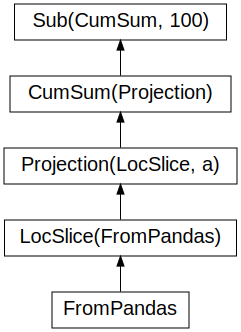

In [13]:
result.dask

result.visualize()

In [14]:
import dask

@dask.delayed
def inc(x):
   return x + 1

@dask.delayed
def add(x, y):
   return x + y

a = inc(1)       # no work has happened yet
b = inc(2)       # no work has happened yet
c = add(a, b)    # no work has happened yet

c = c.compute()  # This triggers all of the above computations

In [16]:
from dask.distributed import Client
client = Client()
client

2025-01-23 00:03:35,523 - distributed.worker - WARNING - Mismatched versions found

+---------+---------------------------------------------+-----------+---------+
| Package | Worker-2940dabd-44d5-4b12-bfcd-7a8355d22822 | Scheduler | Workers |
+---------+---------------------------------------------+-----------+---------+
| lz4     | None                                        | 4.3.3     | None    |
+---------+---------------------------------------------+-----------+---------+
2025-01-23 00:03:35,527 - distributed.worker - WARNING - Mismatched versions found

+---------+---------------------------------------------+-----------+---------+
| Package | Worker-71268b08-7ddf-499b-ba75-ff75ed2750eb | Scheduler | Workers |
+---------+---------------------------------------------+-----------+---------+
| lz4     | None                                        | 4.3.3     | None    |
+---------+---------------------------------------------+-----------+---------+
2025-01-23 00:03:35,539 - distri

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.47 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33111,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.47 GiB
Comm: tcp://127.0.0.1:41489,Total threads: 2
Dashboard: http://127.0.0.1:35855/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:44483,


In [35]:
string = "(())"
# print(len(string))
# parenthesis_tokens = string.split()
count = 0


for i in range(0,len(string)):
    print(string[i])
    if string[i] == "(":
        count += 1
    elif string[i] == ")":
        count -= 1

print(count == 0)
    


(
(
)
)
True
